In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,São Paulo (SP),SP,Sudeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,0,0,0,0,0,1
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Podcast do Data Hackers, Canal do Slack, Newsl...",0,1,1,1,0,0


In [3]:
df.shape

(2645, 356)

In [4]:
df["('P0', 'id')"].nunique()

2641

In [5]:
df.describe(include='all')

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
count,2645,2617.00000,2645,2645,2609,2609,2645,484,2645.000000,2645,...,412.000000,412.000000,412.000000,2645,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000
unique,2641,NaN,9,3,21,21,6,5,NaN,7,...,NaN,NaN,NaN,155,NaN,NaN,NaN,NaN,NaN,NaN
top,yrhjxwscdfl516bibgi0kyrhait8fbnf,NaN,25-29,Masculino,São Paulo (SP),SP,Sudeste,Sudeste,NaN,Graduação/Bacharelado,...,NaN,NaN,NaN,Ainda não conhecia o Data Hackers,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,833,2144,1076,1076,1671,222,NaN,909,...,NaN,NaN,NaN,679,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,31.15705,NaN,NaN,NaN,NaN,NaN,NaN,0.182987,NaN,...,0.019417,0.007282,0.009709,NaN,0.539887,0.542533,0.361815,0.305482,0.227221,0.260870
std,NaN,7.13062,NaN,NaN,NaN,NaN,NaN,NaN,0.386729,NaN,...,0.138155,0.085124,0.098173,NaN,0.498501,0.498282,0.480616,0.460698,0.419116,0.439192
min,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,26.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,30.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,35.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


Observamos que a idade dos entrevistados está entre 18 e 54 anos e a média é de 31.

## Dados demográficos

In [6]:
df["('P1_b ', 'Genero')"].value_counts(normalize=True).round(2)

Masculino    0.81
Feminino     0.19
Outro        0.00
Name: ('P1_b ', 'Genero'), dtype: float64

Entre os entrevistados 81% é do sexo masculino e 19% do sexo feminino.

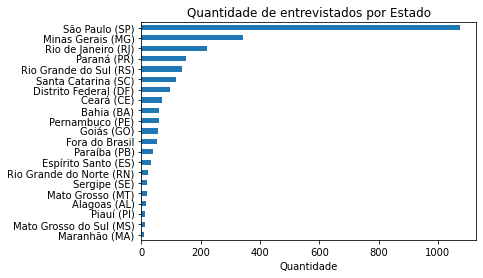

In [7]:
df["('P1_e ', 'Estado onde mora')"].value_counts().sort_values().plot.barh()
plt.title('Quantidade de entrevistados por Estado')
plt.xlabel('Quantidade')
plt.show()

O Estado com maior número de entrevistados é São Paulo, seguido de Minas Gerais e Rio de Janeiro.

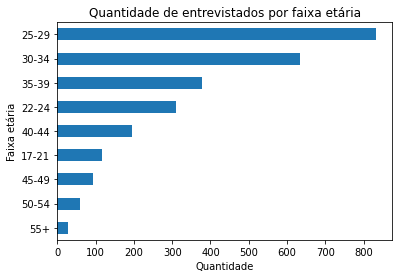

In [8]:
df["('P1_a_a ', 'Faixa idade')"].value_counts().sort_values().plot.barh()
plt.title('Quantidade de entrevistados por faixa etária')
plt.ylabel('Faixa etária')
plt.xlabel('Quantidade')
plt.show()

## Informações educacionais

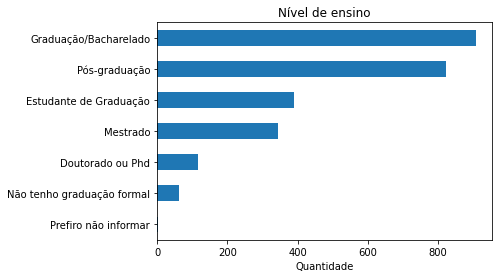

In [9]:
df["('P1_h ', 'Nivel de Ensino')"].value_counts().sort_values().plot.barh()
plt.title('Nível de ensino')
plt.xlabel('Quantidade')
plt.show()

A maioria dos entrevistados tem graduação/bacharelado ou é pós-graduado.

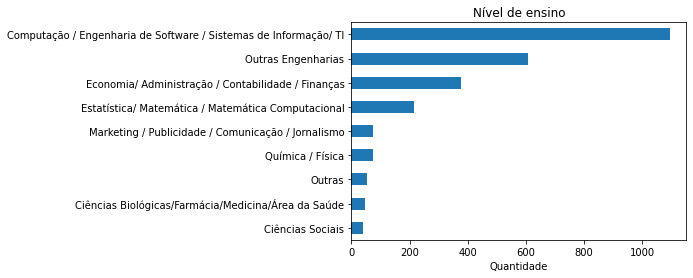

In [10]:
df["('P1_i ', 'Área de Formação')"].value_counts().sort_values().plot.barh()
plt.title('Nível de ensino')
plt.xlabel('Quantidade')
plt.show()

A maioria dos entrevistados é da área de informática, seguidos por engenharias, economia, administração, contabilidade e finanças.

## Informações das empresas

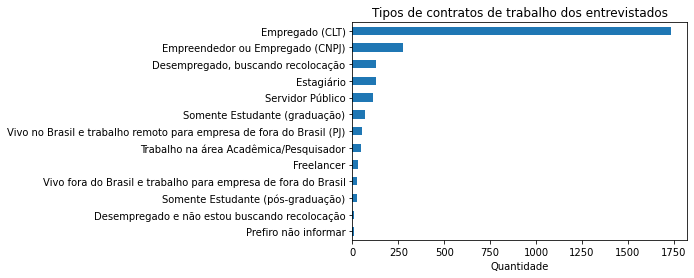

In [11]:
df["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts().sort_values().plot.barh()
plt.title('Tipos de contratos de trabalho dos entrevistados')
plt.xlabel('Quantidade')
plt.show()

A grande maioria dos entrevistados são empregados celetistas.

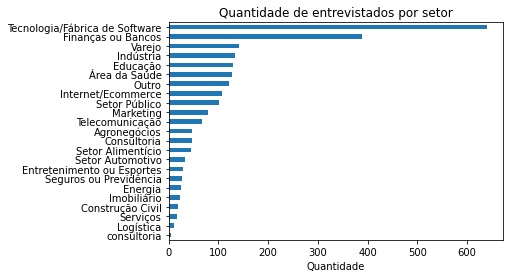

In [12]:
df["('P2_b ', 'Setor')"].value_counts().sort_values().plot.barh()
plt.title('Quantidade de entrevistados por setor')
plt.xlabel('Quantidade')
plt.show()

Os entrevistados estão lotados em sua maioria em setores de tecnologia e/ou fábricas de software, mas podemos observar que o setor financeiro também contrata muitos profissionais de dados.

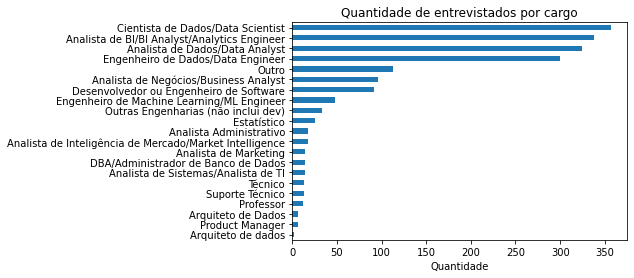

In [13]:
df["('P2_f ', 'Cargo Atual')"].value_counts().sort_values().plot.barh()
plt.title('Quantidade de entrevistados por cargo')
plt.xlabel('Quantidade')
plt.show()

Cientista de dados, analista de BI, analista de dados e engenheiro de dados são os cargos mais frequentes entre os entrevistados.

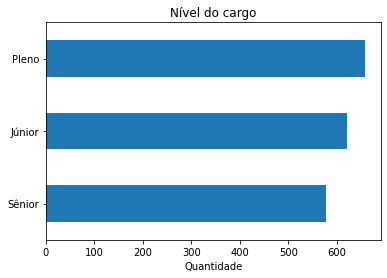

In [14]:
df["('P2_g ', 'Nivel')"].value_counts().sort_values().plot.barh()
plt.title('Nível do cargo')
plt.xlabel('Quantidade')
plt.show()

Temos quase um equilíbrio entre o nível de senioridade dos cargos.

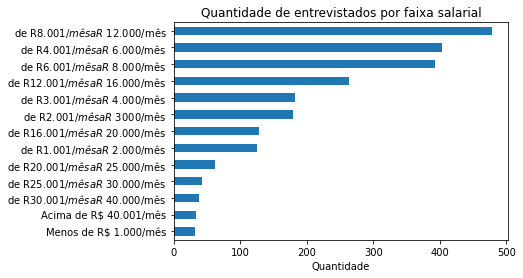

In [15]:
df["('P2_h ', 'Faixa salarial')"].value_counts().sort_values().plot.barh()
plt.title('Quantidade de entrevistados por faixa salarial')
plt.xlabel('Quantidade')
plt.show()

A maioria dos entrevistados ganha entre R$ 8 e R$ 12 mil reais. Em seguida, as faixas de R$ 4 à R$ 6 mil e R$ 6 mil à R$ 8 mil ficam quase com a mesma quantidade de entrevistados.

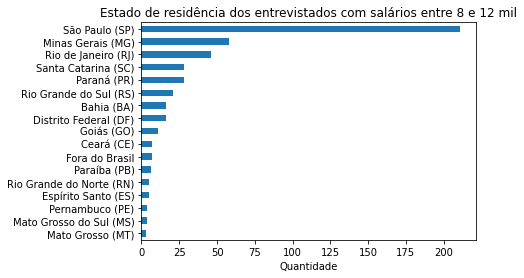

In [16]:
# Vamos analisar em quais estados os entrevistados ganham entre 8 e 12 mil.

df.query("`('P2_h ', 'Faixa salarial')` == 'de R$ 8.001/mês a R$ 12.000/mês'")["('P1_e ', 'Estado onde mora')"].value_counts().sort_values().plot.barh()
plt.title('Estado de residência dos entrevistados com salários entre 8 e 12 mil')
plt.xlabel('Quantidade')
plt.show()

O estado que mais paga entre 8 e 12 mil é São Paulo.

In [17]:
df["('P2_k ', 'Você está satisfeito na sua empresa atual?')"].value_counts(normalize=True).round(2)

1.0    0.74
0.0    0.26
Name: ('P2_k ', 'Você está satisfeito na sua empresa atual?'), dtype: float64

74% responderam que estão satisfeitos com a empresa atual, enquanto 26 não estão.

In [18]:
# Criando dataframe para analisar as insatisfações.
fo = df["('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')"].value_counts()
snc = df["('P2_l_b ', 'Salário atual não corresponde ao mercado')"].value_counts()
nbr = df["('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')"].value_counts()
gto = df["('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')"].value_counts()
grb = df["('P2_l_e ', 'Gostaria de receber mais benefícios')"].value_counts()
cr = df["('P2_l_f ', 'O clima de trabalho/ambiente não é bom')"].value_counts()
fm = df["('P2_l_g ', 'Falta de maturidade analítica na empresa')"].value_counts()

insatisfacoes = {'Falta de oportunidade de crescimento no emprego atual' : [fo[0], fo[1]],
                'Salário atual não corresponde ao mercado' : [snc[0], snc[1]],
                'Não tenho uma boa relação com meu líder/gestor' : [nbr[0], nbr[1]],
                'Gostaria de trabalhar em em outra área de atuação' : [gto[0], gto[1]],
                'Gostaria de receber mais benefícios' : [grb[0], grb[1]],
                'O clima de trabalho/ambiente não é bom' : [cr[0], cr[1]],
                'Falta de maturidade analítica na empresa' : [fm[0], fm[1]]
                }

s = pd.DataFrame(data=insatisfacoes, index=['Não', 'Sim'])

In [19]:
s

,Falta de oportunidade de crescimento no emprego atual,Salário atual não corresponde ao mercado,Não tenho uma boa relação com meu líder/gestor,Gostaria de trabalhar em em outra área de atuação,Gostaria de receber mais benefícios,O clima de trabalho/ambiente não é bom,Falta de maturidade analítica na empresa
Não,345,436,573,394,548,533,340
Sim,267,176,39,218,64,79,272


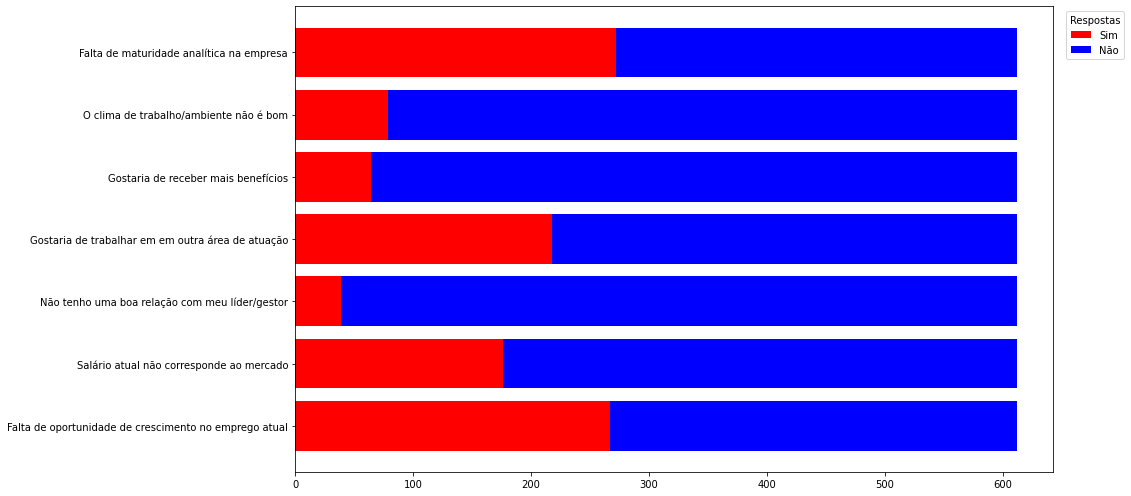

In [20]:
N = 7

plt.rcParams["figure.figsize"] = [16, 7]
plt.rcParams["figure.autolayout"] = True

ins = list(s.columns)
sim = list(s.loc['Sim'])
nao = list(s.loc['Não'])

b1 = plt.barh(ins, sim, color="red")

b2 = plt.barh(ins, nao, left=sim, color="blue")

plt.legend([b1, b2], ["Sim", "Não"], title="Respostas", loc="upper right", bbox_to_anchor=(1.1, 1))

plt.show()

Podemos observar que falta de oportunidade de crescimento e falta de maturidade analítica são às duas maiores queixas entre os entrevistados, enquanto não ter boa relação com o gestor e o desejo de ter mais benefícios são os menores.

Text(0.5, 1.0, 'Entrevistados que participaram de entrevistas nos últimos 6 meses')

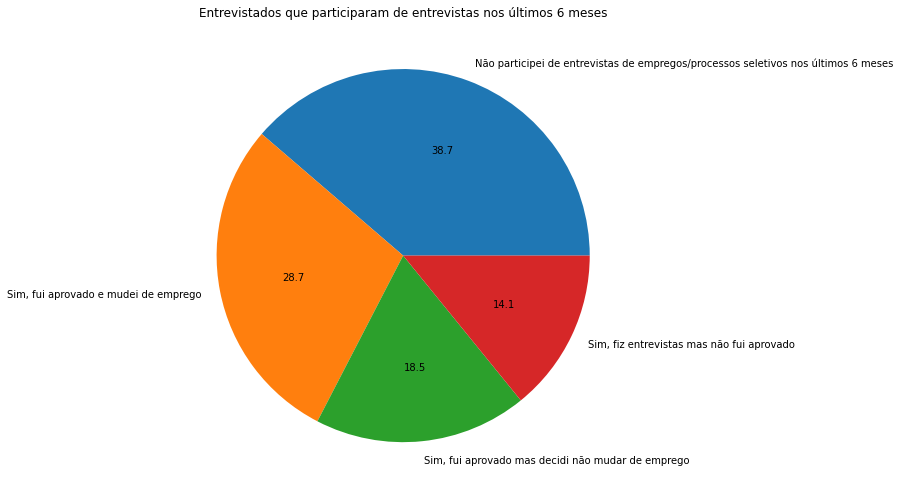

In [21]:
ax = df["('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')"].value_counts().plot(kind='pie', autopct='%.1f', ylabel='')
ax.set_title("Entrevistados que participaram de entrevistas nos últimos 6 meses")

A maioria dos entrevistados não participou, mas 28% participaram e mudaram de emprego.

Text(0.5, 1.0, 'Entrevistados que pretendem mudar de emprego nos próximos 6 meses')

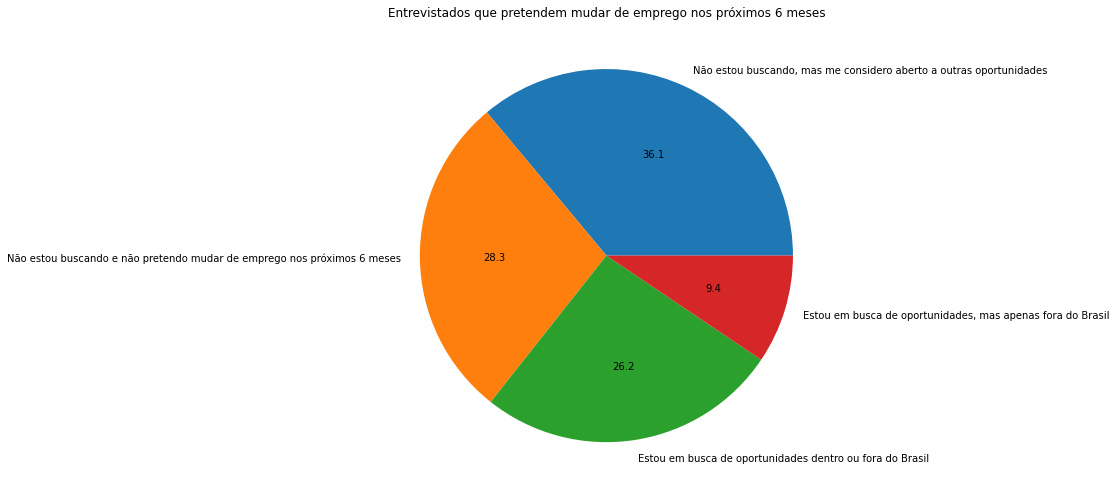

In [22]:
ax = df["('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')"].value_counts().plot(kind='pie', autopct='%.1f', ylabel='')
ax.set_title("Entrevistados que pretendem mudar de emprego nos próximos 6 meses")

Text(0.5, 1.0, 'Forma de trabalho atual')

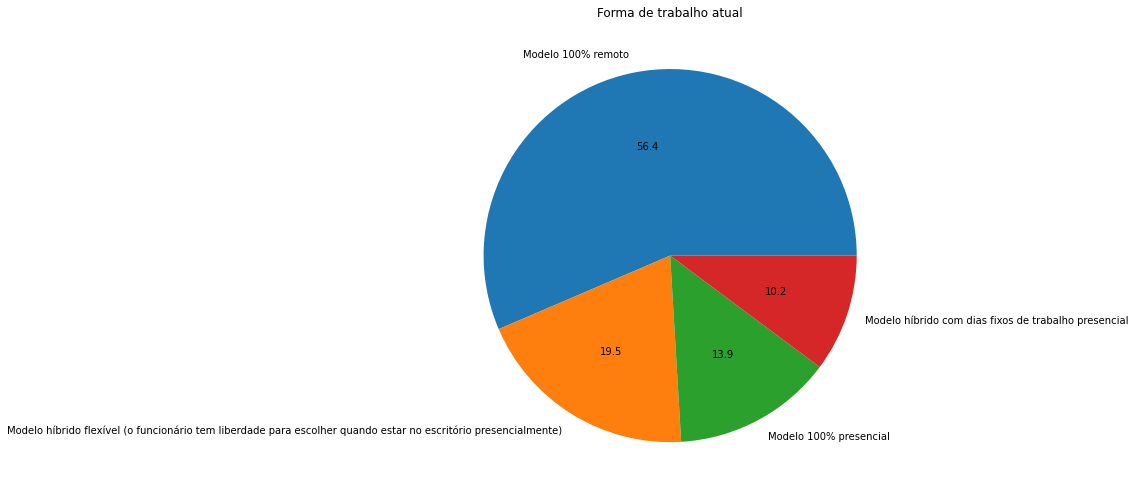

In [23]:
ax = df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].value_counts().plot(kind='pie', autopct='%.1f', ylabel='')
ax.set_title("Forma de trabalho atual")

Text(0.5, 1.0, 'Forma de trabalho ideal entre os entrevistados')

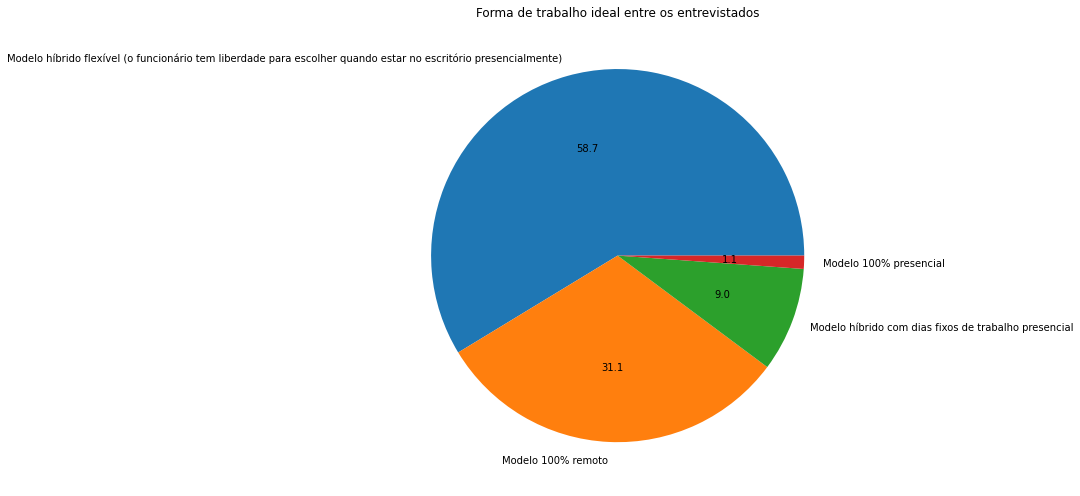

In [24]:
ax = df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"].value_counts().plot(kind='pie', autopct='%.1f', ylabel='')
ax.set_title("Forma de trabalho ideal entre os entrevistados")

## Linguagens mais utilizadas

In [25]:
df["('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')"].value_counts().head(10)

SQL, Python                                    510
Python, SQL                                    166
SQL                                            158
Não utilizo nenhuma das linguagens listadas    155
Python                                          96
SQL, R, Python                                  81
SQL, Python, JavaScript                         49
SQL, Python, Scala                              34
SQL, Python, Visual Basic/VBA                   34
SQL, Visual Basic/VBA                           28
Name: ('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?'), dtype: int64

Aqui podemos observar que Python e Sql são as mais utilizadas de acordo com os entrevistados.
Vamos analisar melhor utilizando as colunas com as alternativas.

In [26]:
sql = df["('P4_d_a ', 'SQL')"].value_counts()[1]
r = df["('P4_d_b ', 'R ')"].value_counts()[1]
python = df["('P4_d_c ', 'Python')"].value_counts()[1]
c = df["('P4_d_d ', 'C/C++/C#')"].value_counts()[1]
net = df["('P4_d_e ', '.NET')"].value_counts()[1]
java = df["('P4_d_f ', 'Java')"].value_counts()[1]
julia = df["('P4_d_g ', 'Julia')"].value_counts()[1]
sas = df["('P4_d_h ', 'SAS/Stata')"].value_counts()[1]
vba = df["('P4_d_i ', 'Visual Basic/VBA')"].value_counts()[1]
scala = df["('P4_d_j ', 'Scala')"].value_counts()[1]
matlab = df["('P4_d_k ', 'Matlab')"].value_counts()[1]
php = df["('P4_d_l ', 'PHP')"].value_counts()[1]
js = df["('P4_d_m ', 'Javascript')"].value_counts()[1]
n = df["('P4_d_n ', 'Não utilizo nenhuma linguagem')"].value_counts()[1]

df_ling = pd.DataFrame(
   dict(
      linguagens=['SQL', 'R', 'PYTHON', 'C/C++/C#', '.NET', 'JAVA', 'JULIA', 'SAS/STATA', 'VISUAL BASIC/VBA', 'SCALA',
        'MATLAB', 'PHP', 'JAVASCRIPT', 'NENHUMA'],
      qts=[sql, r, python, c, net, java, julia, sas, vba, scala, matlab, php, js, n]
   )
)

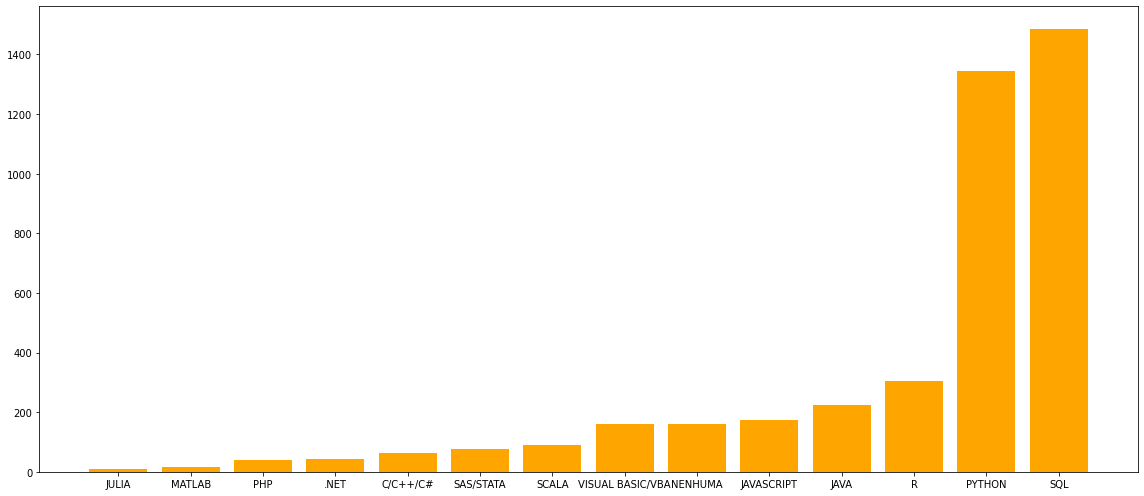

In [27]:
fig = plt.figure()

plt.plot(122)
df_sorted = df_ling.sort_values('qts')
plt.bar('linguagens', 'qts', data=df_sorted, color='orange')

plt.show()

As linguagens mais utilizadas são SQL, Python e R, enquanto Julia e Matlab são as menos utilizadas entre os entrevistados.